# Understanding regional under-diagnosis of dementia

This project explored whether we could use publicly available datasets, and some statistical models to investigate how the rate of dementia diagnosis varies across different local authority districts (LADs) in England, specifically in relation to deprivation. 


## In 2023, Dementia was recorded as the leading cause of death on over 11% of all death records in England and Wales. 

Research suggests that by 2030, over 1 million people will be living with dementia in the UK. ‘Dementia’ is an umbrella term used to refer to various different neurodegenerative conditions - Alzheimer’s disease is the most common, followed by vascular dementia, but there are many other types as well. This analysis is based on cases rates reported per GP practice from the NHS published Quality Outcomes Framework (QOF) - this dataset doesn’t delineate the different types of dementia - so in the subsequent data analysis I’ll be using the umbrella term. 

Receiving a diagnosis of dementia from the GP is the first step in a referral pathway to further care. In best practice, off the back of this diagnosis patients should 1) receive tailored care interventions - which could include prescription of drugs, and or guidance about local state care services, as well as 2) a referral to a memory clinic, where neurologists can provide a differential diagnosis. 

![](pathway.png)
*A diagram of dementia pathway.*

It is expected that later this year the MHRA and NICE will approve the UK licensing of Lecanemab - the first drug which targets the build up of amyloid beta which is believed to be the root cause of Alzheimer’s (the drugs currently available alleviate symptoms). Whilst the prospective licensing of this drug has proved controversial (it costs over $26,000 per patient per year; it has side-effects which require regular monitoring with MRI scans - which might be difficult seeing as the UK has one of the [smallest](https://data.oecd.org/healtheqt/magnetic-resonance-imaging-mri-units.htm) and [oldest](https://www.theguardian.com/society/2021/oct/18/nhs-england-hospitals-having-to-rely-on-obsolete-imaging-equipment) stock of MRI scanners in Europe; it's treatment effect is small), the hope of a potential cure stresses the need for timely diagnoses.

In recent years, concerns about GP practices failing to record dementia cases led to the government running [financial incentive schemes](https://navigator.health.org.uk/theme/dementia-identification-scheme) to encourage GP practices to register more dementia diagnoses. Despite this, existing estimates suggest less than 2/3rds of people living with dementia currently receive a diagnosis in the UK. 

## This has already been researched 

Previous work has explored dementia diagnosis in different areas around the UK, in particular this [publication from 2017](https://www.cambridge.org/core/journals/primary-health-care-research-and-development/article/variations-in-dementia-diagnosis-in-england-and-association-with-general-practice-characteristics/18A64D2EF4CBEC49874B343C1B41D651), spotlighted by the [Alzheimer’s society](https://www.alzheimers.org.uk/sites/default/files/2021-09/regional_variations_increasing_access_to_diagnosis.pdf) and the all-party-parliamentary-group on dementia. In this publication they (seemingly counter-intuitively) found ‘more deprived areas have a higher diagnosis rate’, specifically an 8.2% difference in diagnosis rates between the least and most deprived GP practices. 

Both this study, the ONS and the NHS, calculate diagnosis rate by dividing the number of observed cases by the [prevalence rate](https://digital.nhs.uk/data-and-information/publications/statistical/primary-care-dementia-data/primary-care-dementia-data-supporting-information/primary-care-dementia-data-methodology). This (unobservable) prevalence rate is calculated using this [cohort study](https://www.thelancet.com/pdfs/journals/lancet/PIIS0140-6736%2813%2961570-6.pdf), which sampled an over 65 year population across just three areas of the England (Cambridgeshire, Newcastle, and Nottingham), and estimated prevalence as a function of age and gender. Whilst this prevalence rate offers a general estimate of true dementia occurence, it doesn't account for the fact that there are socio-economic factors, such as educational attainment, that confound both deprivation and dementia. As a result, research that generalises from the comparison statistic of observed diagnoses vs. prevalnece rate, aren't accounting for the breadth of covariates which impact prevalence or diagnostic variablility. 

## Our method

We decided to investigate modelling the rate of regional diagnosis using a range of publicly available datasets. In particular, in contrast to previous work, we didn’t use any prior statistics for the true prevalence rate, but we did account for a much broader selection of covariates that we expect to affect dementia prevalence and diagnosis. 

### Data
All the data is compiled at the level of local authority districts (LADs) - these include the London Boroughs, Metropolitan districts and Unitary Authorities. 

- [Quality Outcomes Framework](https://digital.nhs.uk/data-and-information/publications/statistical/quality-and-outcomes-framework-achievement-prevalence-and-exceptions-data) - records GP practise performance and disease prevalence.
- [GP count per practice](https://www.nhsbsa.nhs.uk/prescription-data/organisation-data/practice-list-size-and-gp-count-each-practice) - number of GPs employed at each practice plus the population size of each practice.
- [Mid year population estimates by age](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/adminbasedpopulationestimatesforlocalauthoritiesinenglandandwales)
- [2021 census ethnicity](https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/ethnicity/bulletins/ethnicgroupenglandandwales/census2021)
- [2021 census educational attainment](https://www.ons.gov.uk/datasets/TS067/editions/2021/versions/1/filter-outputs/f63486f4-5e12-4d7b-96ef-573a9225a438#get-data)
- [2021 LAD boundaries](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-december-2021-boundaries-gb-bfc/\explore) (geojson)

### Covariates 

#### Things which affect prevalence 
These are things which could affect whether or not you actually develop dementia. We included:

`age/population` - This is the biggest risk factor for dementia, the older you get the more likely you are to get it. The data for this came from the mid-year population estimates. 

`sex/population` - Dementia is slightly more common amongst women than men, partly due to the confounder that women typically live to an older age than men. The data for this also came from the mid-year population estimates. 

`educational attainment/population` - Education is one of the largest modifiable risk factors for dementia. Studies have found that higher levels of education are correlated with higher cognitive reserve, which in turn can reduce your chance of developing dementia. This data came from the 2021 census.

`ethnicity/population` - Some ethnic minorities have been found to be at slightly higher risk of developing dementia. This isn’t a straightforward relationship and is complicated by the fact that these groups of people may be at higher risk of developing comorbidities, but due to religious or cultural stigma may be less likely to seek a formal diagnosis. This data came from the 2021 census. 

`comorbidities/population` - ‘Comorbidities’ refers to co-occurring health conditions. We included: hypertension, diabetes and stroke occurrence, which research has shown have the largest correlation. This data came from the QOF. 

#### Things which affect your ability to get a diagnosis

These are the things which are going to affect your ability to receive a dementia diagnosis from your GP.  

`number of GP practitioners/population` - We used the number of general practitioners as a proxy for healthcare provision. We chose the number of practitioners, rather than the number of practices, as the number of doctors per practice varies widely, and previous studies have linked those with a single doctor to lower diagnosis rates. 

As highlighted by a recent [report](https://static1.squarespace.com/static/5ee7a7d964aeed7e5c507900/t/65e8a83825fec503eb2ae56b/1709746232505/gaps-in-healthcare-statistics.pdf) from The Centre for Public Data, this data is not publicly available - however there is data on both the number of GPs per practice, and the geographic boundaries of GP catchment areas which allowed us to estimate this figure. 

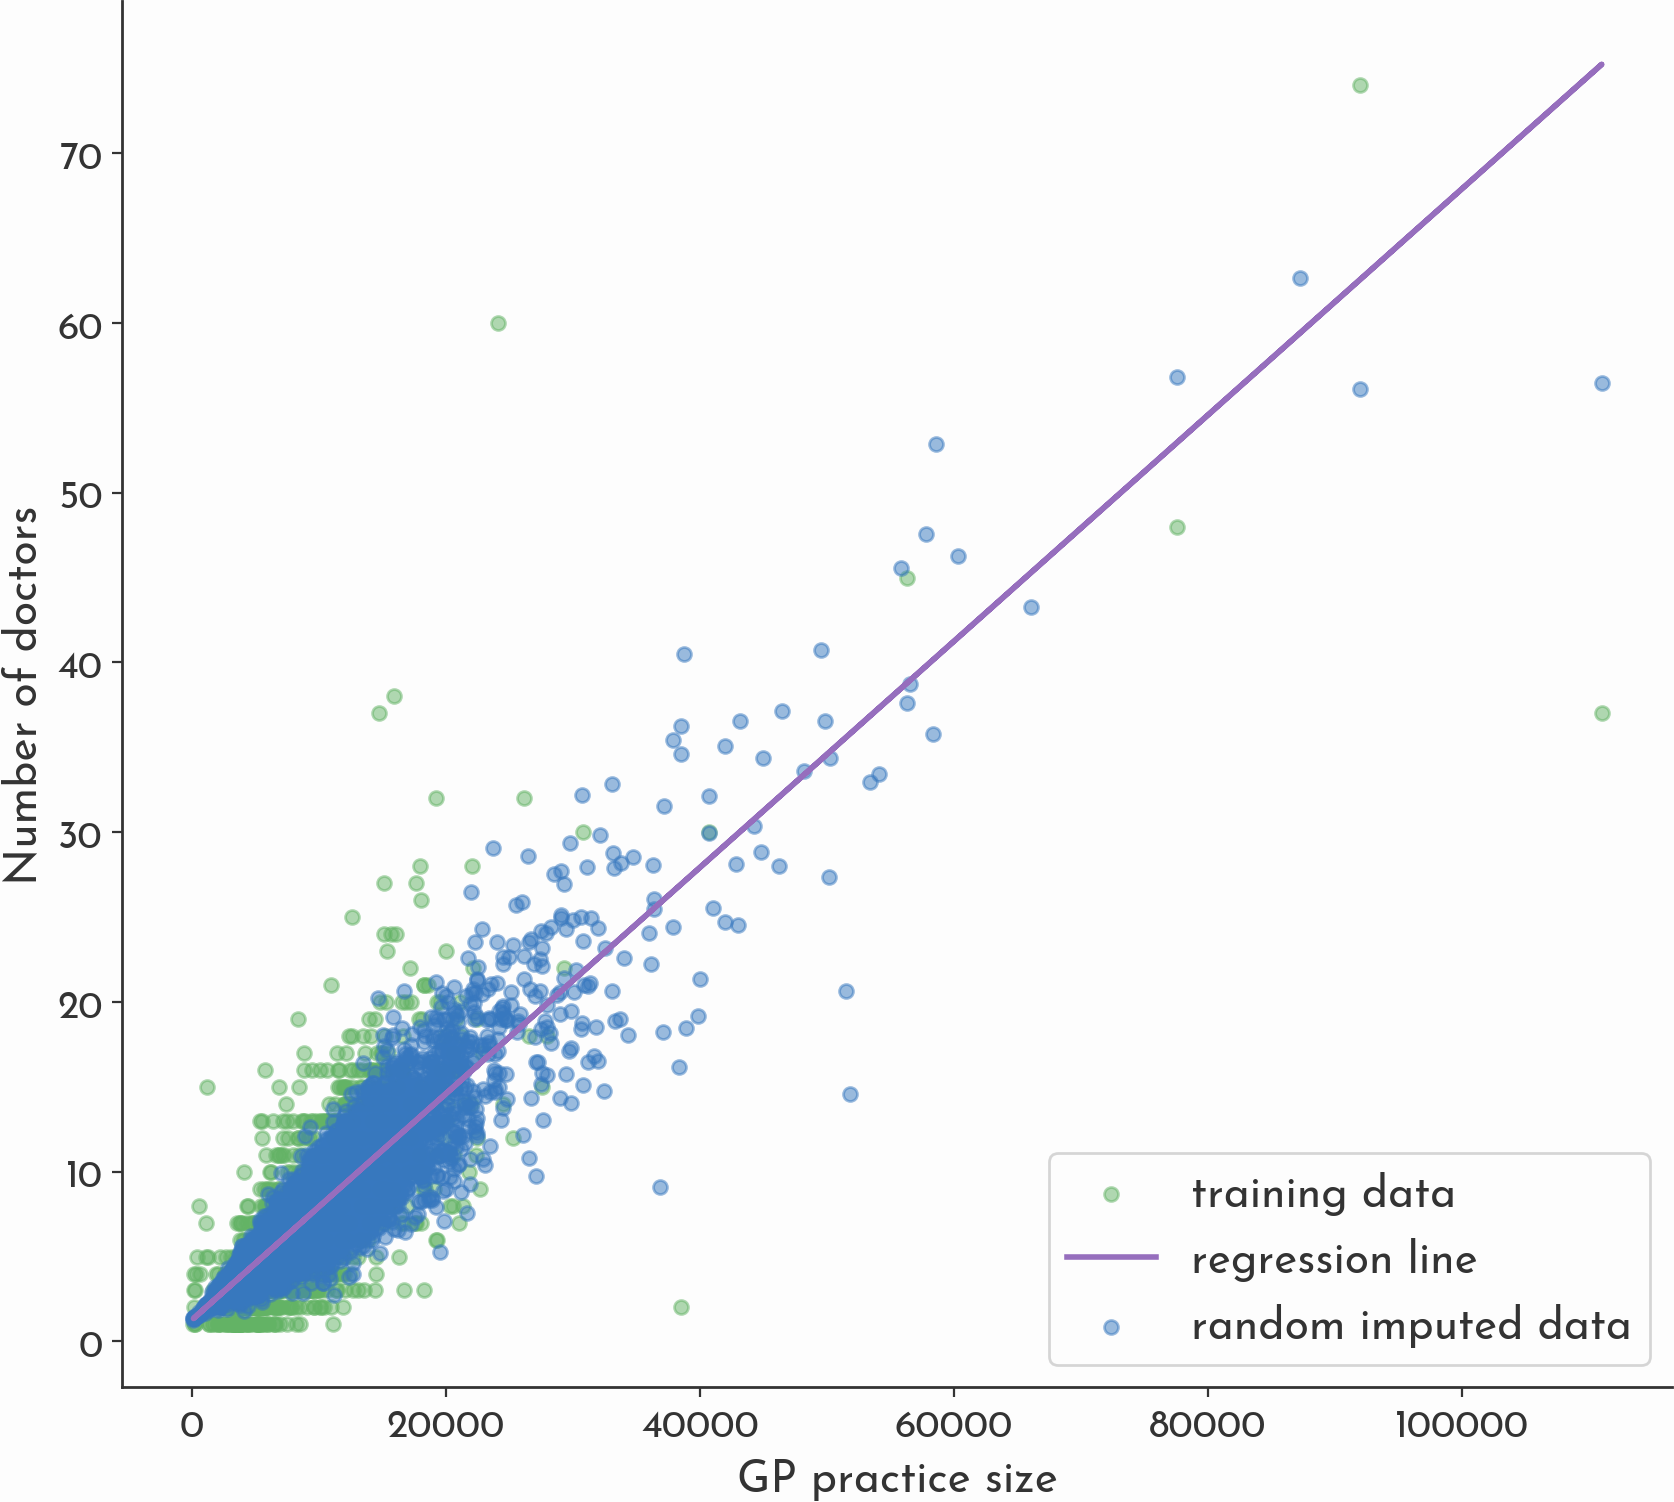

We did this by first imputing the missing data on GPs per practice. The dataset available had over 80% missing data, which we imputed following [this description](http://www.stat.columbia.edu/~gelman/arm/missing.pdf) of random imputation by Andrew Gelman, using practice size as a covariate in the regression. Next we calculated what percent of each GP practice overlapped with each LAD using GeoPandas, and assigned GPs according to this fraction. We ended up with an estimate of the number of GPs per LAD. 

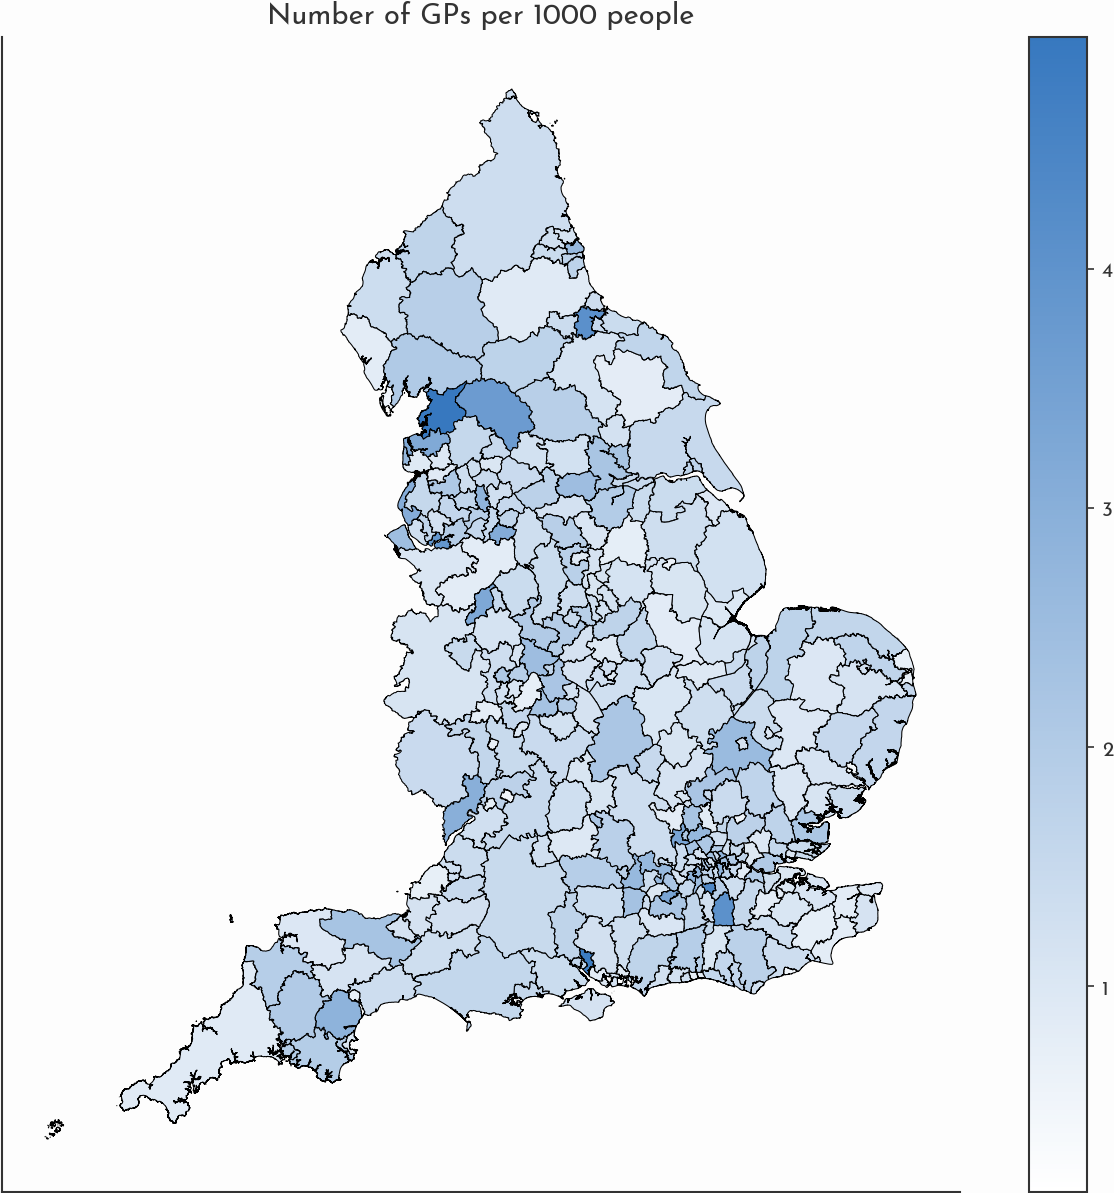

#### What about confounders and collinearity? 

Ok, so some of these covariates can’t be reduced to solely affecting prevalence or diagnosis, and many of them interact with one another. Some literature on covariates warns about the [perils of collinearity](https://www.econlib.org/archives/2005/09/multicollineari.html). Collinearity is when two variables are so closely intertwined it’s difficult to distinguish the effect they have on the model. However, you only need to worry about two variables if they have perfect collinearity i.e. $v_1 = \alpha + \beta v_2$ (which would result in non-invertible matrices - nasty!). This basically never happens in practice - you would have to include say height in inches and height in cm. In most cases, if you have variables which you think might be highly correlated then you want to include all of them in order to understand how they affect the model. The only thing to watch out for is that when there is collinearity between variables, then you often get larger errors.

### Multiple Linear regression

Multiple linear regression models are the most fundamental of machine learning methods - they allow us to understand the relationahip between dependent and independent variables. In full generality, a regression model is of the following form

$$
Y_i = f(X_i; \boldsymbol{\beta}) + \epsilon_i
$$

where $f(\cdot; \boldsymbol{\beta})$ is the model, $\boldsymbol{\beta}$ are a vector of model parameters and $\epsilon_i$ is the measurement error. $Y_i$ is called the dependent variables (dementia diagnoses), and $X_i$ the independent variables (covariates). We index the variables over $i$, in this case the number of LADs. In a linear regression model, f is linear, with $f(X_i; \boldsymbol{\beta}) = \boldsymbol{\beta}X_i$. We make some assumptions about the error, firstly we assume that there is only error in the measurements $Y_i$, and not in $X_i$. Secondly, we assume that the error is normally distributed $\epsilon_i \sim \mathcal{N}(0, \sigma)$; and thirdly that the error is [identically and independently distributed](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables).


In the absence of any error, the assumption is that the true values fit exactly onto the model, so we would have $Y_i = \boldsymbol{\beta}X_i$. In the real world however this is rarely the case, and this discrepancy is \explained by the presence of measurement errors $\epsilon_i$. 

In the regression literature, the error term $\epsilon_i$ is often referred to as the model residual $res_i = y_i - \beta X_i$. 

Given that we have a dataset of observations of $y_i$ and $X_i$, we can fit the model to find $\boldsymbol{\beta}$. This can be done either using ordinary least squares (OLS), or by minimising the objective function which is the log likelihood of the normal error term (more on that to come). In python you can use built in packages such as `scikit-learn` or `statsmodel` which both use OLS. 

Initially we trained the model on the whole dataset of 309 LADs. We then trained on a subset of the data, chosen as the 50 least deprived regions according to the annual deprivation index (ADI). We chose this subset based on our a priori idea that wealthier regions where people have easy access to healthcare services would have higher rates of dementia diagnosis. 

### Non-normal errors terms 

So far we've modelled the dementia diagnosis rate - that is the fraction of the population receiving a dementia diagnosis. But what if instead we tried to model the true prevalence rate - i.e. if 100% of individuals with dementia received a diagnosis. 

Given that dementia is very rarely over diagnosed, and we know there are significant structural problems with diagnosing dementia, we assume the diagnosis rate is always going to be less than or equal to the true prevalence rate. Modelling the relationship as:

$$ \text{diagnosis} = \text{prevalence} + \epsilon$$

then the PDF $p(\epsilon)$ of $\epsilon_i$ should satisfy $p(\epsilon) = 0$ for $\epsilon > 0$. We assume that prevalence can be described using a linear model, so:

$$y_i = \boldsymbol{\beta}X_i + \epsilon $$

Options for the choice of $p(\epsilon)$ include the (reflected) log normal model, and the half normal model. 

![](image-7.png)
*Sketch of alternative model - that uses a log normal distribution for the error term.*

We optimise this function to find the maximum likelihood estimate (MLE) of the model parameters. We can't use OLS, since this relies on the asumption that the error is normal, and furthermore it doesn't provide any estimate of the parameters of the error term.  Instead we optimise the log likelihood of the error. 

We can model the error as the reflected log normal distribution, shifted to be centred on the regression line. As a result we end up with an [additional parameter](https://stats.stackexchange.com/questions/379980/understanding-the-shifted-log-normal-distribution) ($\delta$) compared to the standard log normal.

The reflected & shifted log-normal PDF at $x$ is: 

$$
p(x|x<\delta, \delta, \mu, \sigma) = 
\frac{1}{(\delta - x)\sigma \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma^2}(\\ln(\delta - x)-\mu)^2}
$$
where, 
* $\mu$ is the scale parameter - it stretches and compresses
* $\sigma$ is the shape parameter - it controls how skewed/heavy tailed the distribution is 
* $\delta$ is the shift parameter - here the shift is the linear equation: $\delta = \boldsymbol{\beta} X$

Now, accordingly, the probability of a datapoint being distributed according to this log-normal error is: 

$$
p(y_i|y_i < \beta X_i, \beta, \mu, \sigma) = 
\frac{1}{(\beta X_i - y_i)\sigma \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma^2}(\\ln(\beta X_i - y_i)-\mu)^2}
$$

And hence, the likelihood is: 

$$
L(\delta, \mu, \sigma) = \prod_{i=1}^n p(y_i | y_i < \beta X, \beta X, \mu, \sigma) \\

= \prod_{i=1}^n \frac{1}{(\beta X_i - y_i)\sigma \sqrt{2 \pi}} e^{-\frac{1}{2 \sigma^2}(\\ln(\beta X_i - y_i)-\mu)^2}
$$

Let $ z_i = \beta X_i -y_i $. Then we have a log likelihood of:

$$
\ln(L(\delta, \mu, \sigma))= \sum_{i=1}^n \ln(\frac{1}{z_i \sigma \sqrt{2 \pi}} \exp(- \frac{(\ln z_i - \mu)^2}{2 \sigma^2})) \\ 
= \sum_{i=1}^n \ln(\frac{1}{z_i \sigma \sqrt{2 \pi}} ) - \frac{\ln^2z_i -2\mu \ln z_i + \mu^2}{2 \sigma^2} \\
= \sum_{i=1}^n - \ln(z_i \sigma \sqrt{2 \pi}) - \frac{1}{2 \sigma^2}(\ln^2z_i -2\mu \ln z_i + \mu^2) \\
= \sum_{i=1}^n \frac{1}{2 \sigma^2}(2\mu \ln z_i - \ln^2 z_i - \mu^2) - \ln(z_i \sigma \sqrt{2 \pi}) \\

$$

We implemented a function to calculate the log likelihood, which we then minimised the negative of using `scikit-learn.minimize`. 

## Findings 

So, what do the residuals on the multiple linear regression look like? 

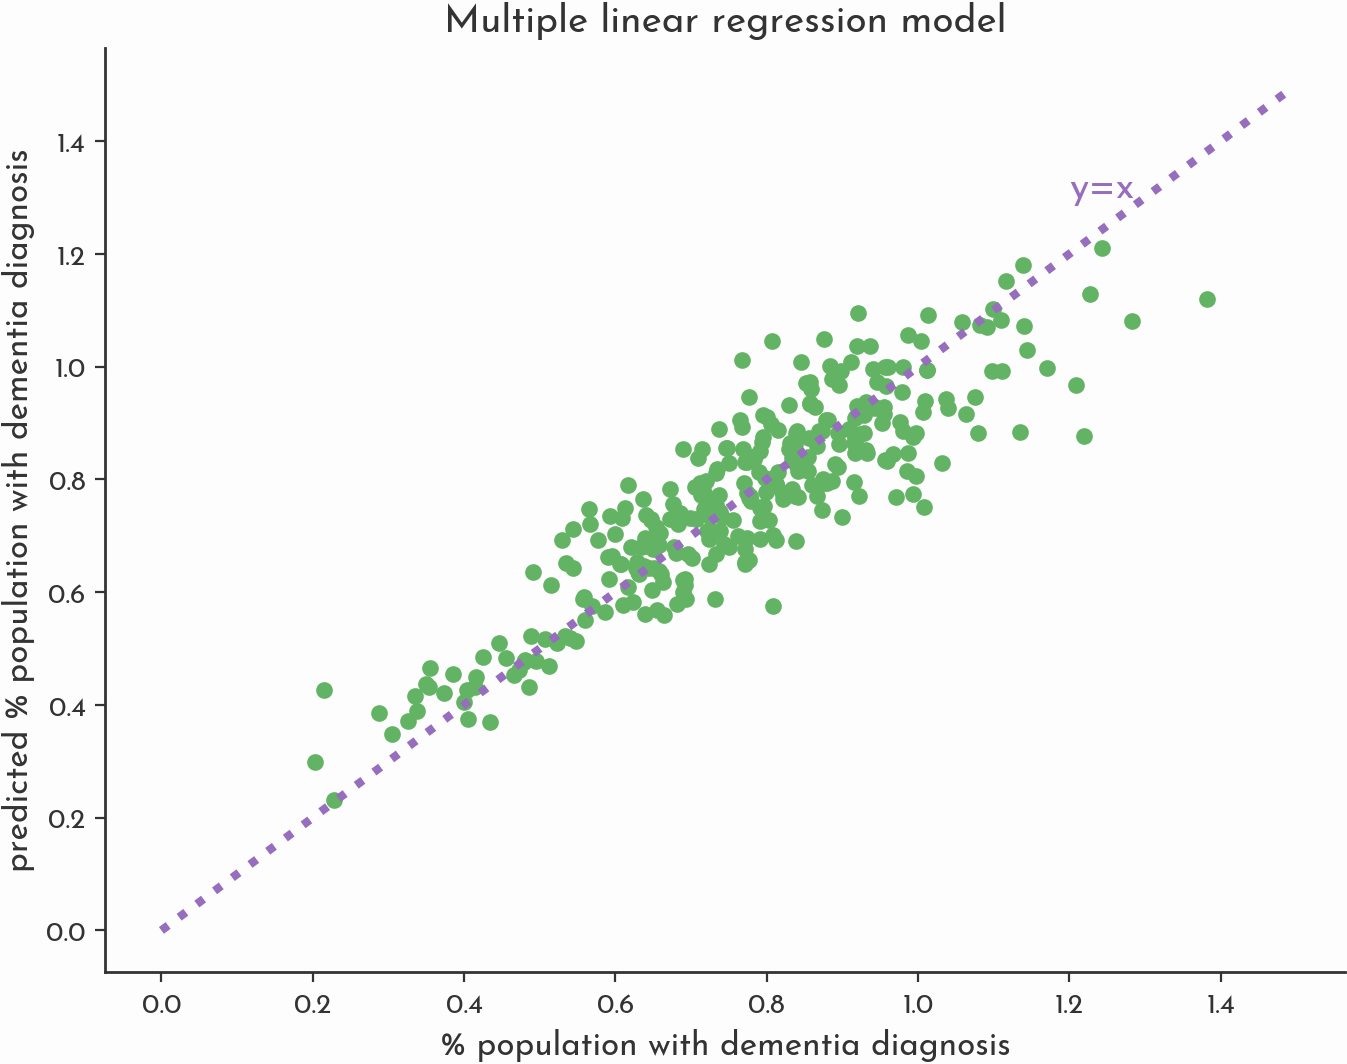

Now we can plot the residuals of the multiple linear regression model again, but trained on the subset of 50 least deprived regions accoridng to the IMD. Looking at these residuals, we see that the scatter of points representing LADs seems to have shifted above the line of equality, suggesting that more regions now have a higher predicted diagnosis rate than that which is observed in practice compared to the previous model. This suggests that the subset of data we chose to train on, does represent a better diagnosis rate compared to the entire set of LADs.  This result alone indicates a correlation between deprivation and underdiagnosis. 

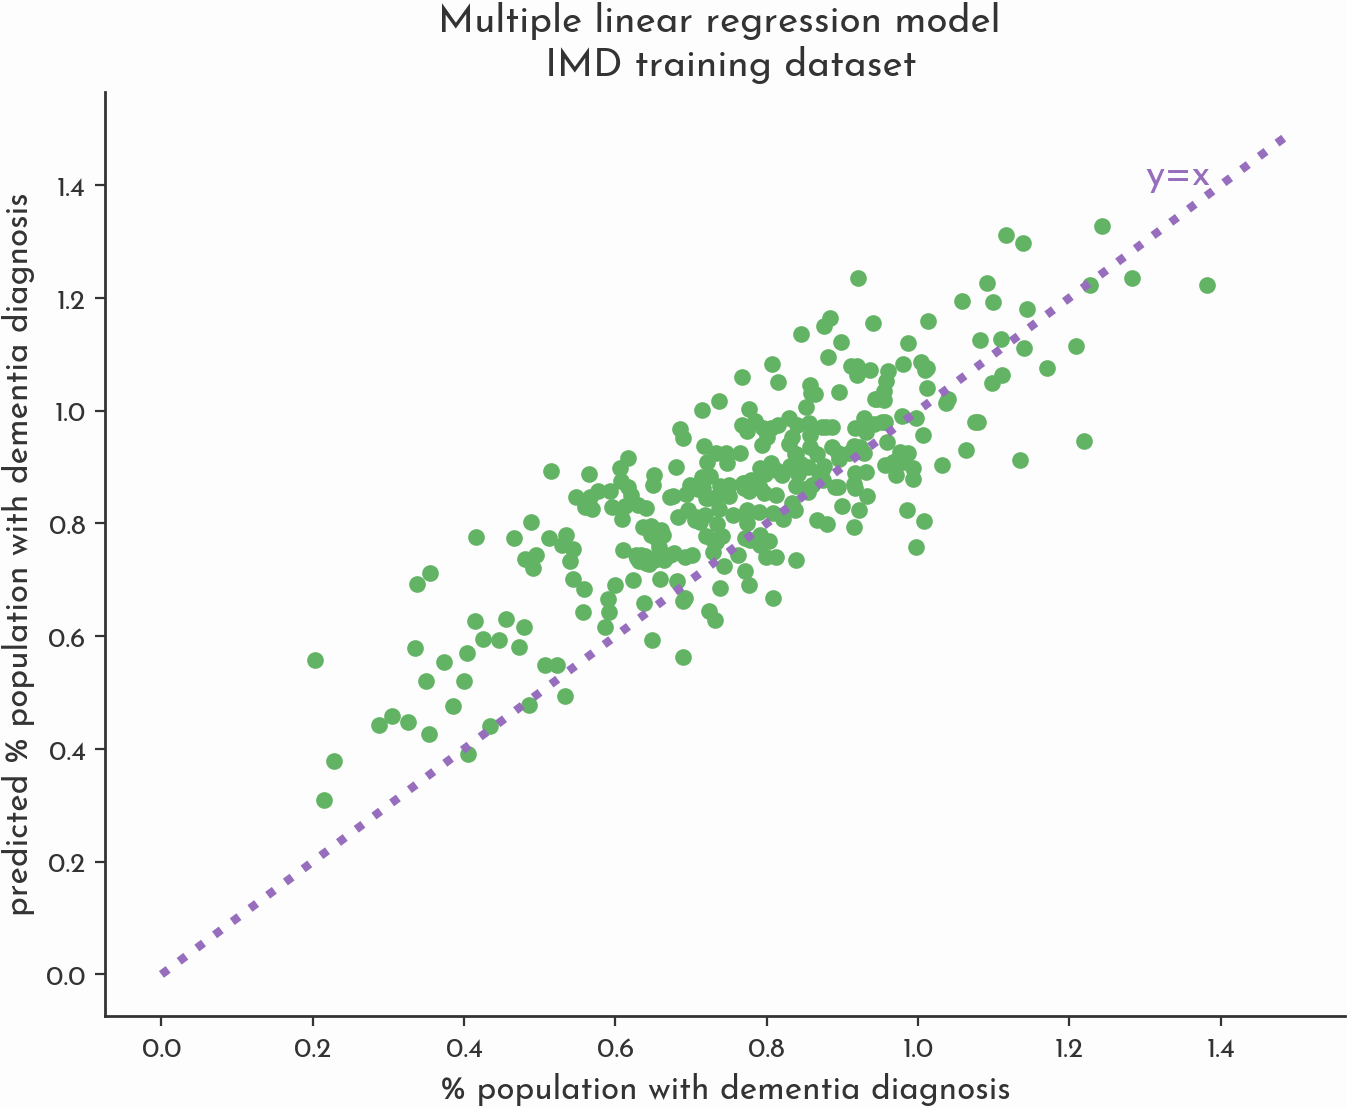

These are the covariates of the IMD training dataset model: 

And we can look at the regional plot of the residuals from the IMD training set model. 

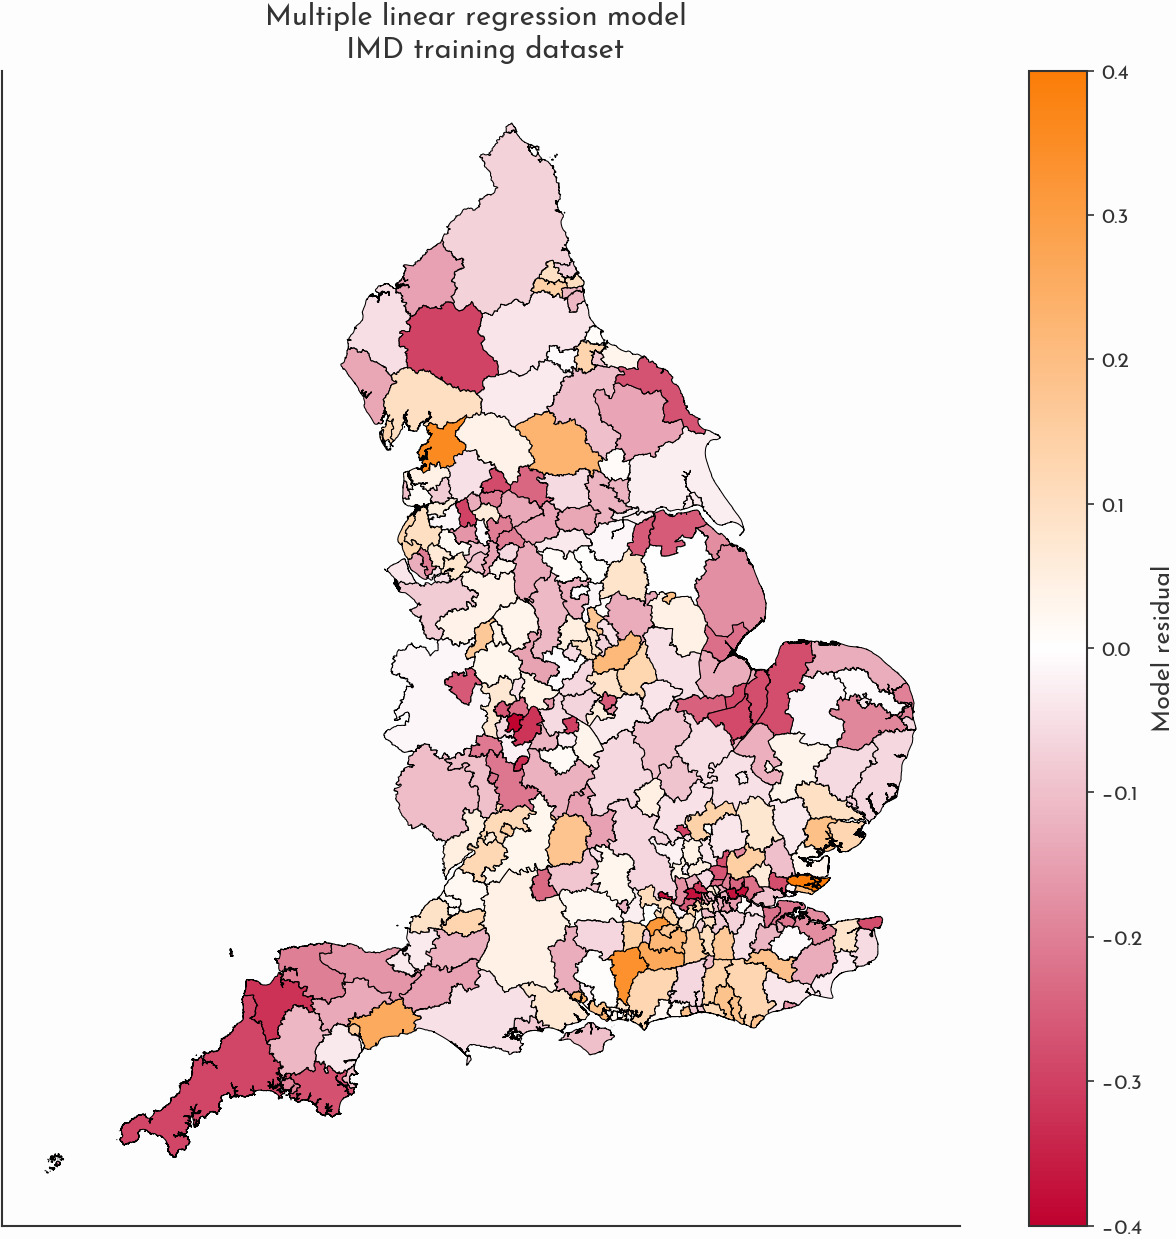

Now instead we can consider the findings from the Log-normal model. Here the coefficients are: 

And we can visualise the normalised(?) error term: 

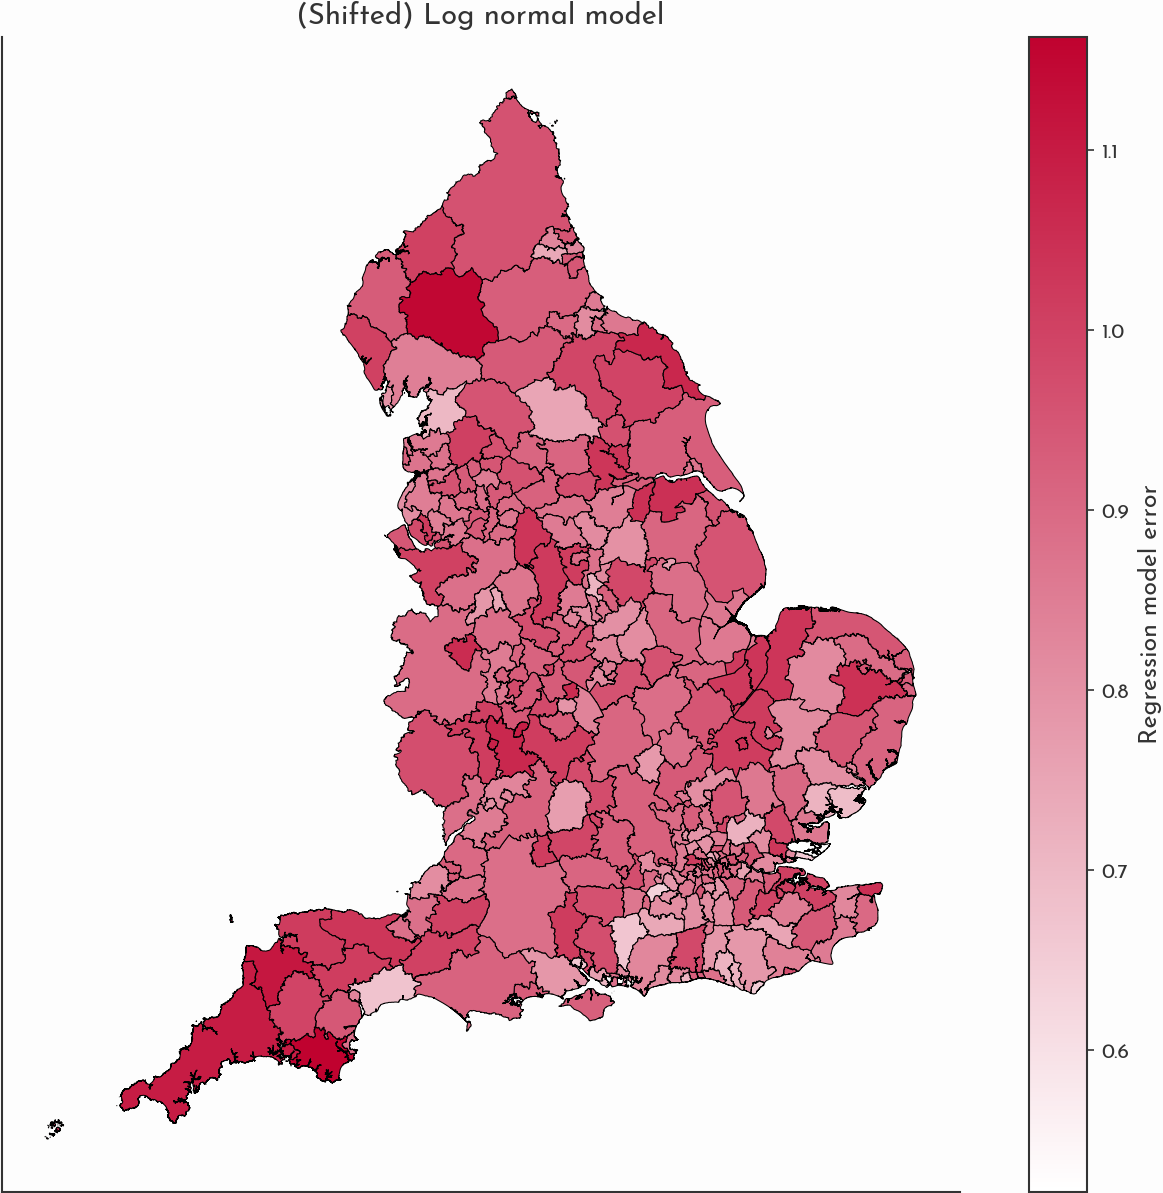

How do these two models compare statistically? 

And what about when we compare regions across the two:

## So what next? 

Lots of interesting avenues of research - including: 
* The log normal assumes the same error distribution. In reality, we would expect it to be heteroskedastic (e.g. higher error if more deprived, or lower GP density etc)
* Doing it by LSOA

And keen to look at how these indicators of underdiagnosis might relate to the next steps in the dementia care pipeline. 

## In conclusion 